If you haven't submitted your model to the model records repository, you can host it locally and still import the relative dependency

In [13]:
from modelrecords.repository import Repository
from modelrecords.card_document_renderer import CardDocumentRenderer
import pygraphviz as pgv
def render_modelgraph(nodes, edges, records):
    styles = {
        'family': dict(shape="house", style="rounded, filled",penwidth=0.5, height=0.25, fillcolor="#CBC3E3", fontname="Helvetica"),
        'dataset': dict(shape="cylinder", style="rounded, filled",penwidth=0.5, width=0.75, height=0.25, fillcolor="#E0B7F3", fontname="Helvetica"),
        'model': dict(shape="box", style="rounded, filled", penwidth=0.5, height=0.25, fontcolor="#FFF", fillcolor="#800080", fontname="Helvetica"),
    }

    G = pgv.AGraph(directed=True, rankdir="L", strict=False, nodesep=0.2, style='rounded', overlap=True, splines='ortho')
    for node in nodes:
        node_style = styles[records[node].type]
        if hasattr(records[node], 'safety') and records[node].safety.csam:
            node_style['fillcolor'] = 'red'
        G.add_node(node, **node_style, label=records[node].model_name)
    for A, B in edges:
        G.add_edge(B, A, color="#545454", penwidth=0.75, shape='rect', arrowsize=0.75)

    #G.graph_attr.update(dpi="90")#, size="10,10", ranksep="0.25", nodesep="0.15", margin="1")
    G.node_attr.update(fontsize="9", fontcolor="black", color="black")
    #G.edge_attr.update(fontsize="8", fontcolor="black", color="black")
    G.layout(prog="dot") 
    return G

repository = Repository()

mr = repository.load_model_record_from_path('mymodel-1.0.0.yaml', pkg_name="MyModel")
mr.package_name()

'MyModel'

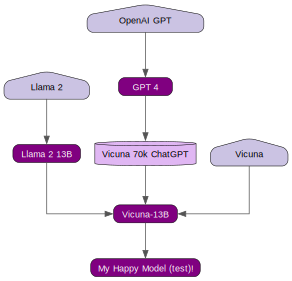

In [14]:

nodes, edges, records = repository.find_parent_packages(mr)
display(render_modelgraph(nodes, edges, records))

In [15]:
CardDocumentRenderer(mr).save_pdf()

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./output/modelrecord.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/hyperref/hyperref.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/kvsetkeys/kvsetkeys.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/pdfescape/pdfescape.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
(/usr/